<a href="https://colab.research.google.com/github/stalord63/SentimentalNLP/blob/main/worlcloud_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
print("hello")

hello


In [5]:
import tweepy
from textblob import TextBlob


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [20]:
from wordcloud import WordCloud

In [22]:
consumerKey="cEot4sxnHWixSDObxMf5HoInN"
consumerSecret="TcnWQ9p0DPIW452Sf1cF1qIU5lFFBqMC6KDG8qOotNkETjk8An"
accessToken="3230336007-sXbbf5E1lxYh2MoRWGCSEKqX9q8ytJc9XPshVtD"
accessTokenSecret="yY4ppc5xfKptj8D8ZjNwd0P1FlfnUahT4riaL2FJIIPvF"

In [23]:
authenticate=tweepy.OAuthHandler(consumerKey,consumerSecret)
authenticate.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [24]:
post=api.user_timeline(screen_name="BillGates",count=100,lang="en",tweet_mode="extended")

In [30]:
print("show 5 tweets")
i=1
for tweet in post[0:5]:
  print(str(i)+ ')'+ tweet.full_text+ '\n')
  i=i+1

show 5 tweets
1)The persistence of countless Rotarians gives me hope that we can achieve a polio-free world. As they close the #Rotary21 Convention, I'd like to thank @Rotary for the continued partnership to #endpolio. https://t.co/sZ4dRiuiXk

2)I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s like to steer a country through challenging times. https://t.co/RgpXbkOnDw

3)This book gave me a deeper, more nuanced appreciation for the system that is at the core of humanity’s fight against COVID-19 and everything our foundation’s Global Health program is trying to do. https://t.co/uTUH19oKKc

4)If you’re looking for a good book to read this summer, these are some of my favorites. https://t.co/e19FKzFFL1

5)The @G7’s commitment to share 870M COVID-19 vaccine doses over the next year is welcome news - but time is not on our side. Vaccines must be delivered now to help control the pandemic everywhere a

In [33]:
df = pd.DataFrame( [tweet.full_text for tweet in post],columns=['Tweets'])
df.head()

,Tweets
0,The persistence of countless Rotarians gives m...
1,I'm almost always interested in books about Am...
2,"This book gave me a deeper, more nuanced appre..."
3,If you’re looking for a good book to read this...
4,The @G7’s commitment to share 870M COVID-19 va...


In [36]:
#clean the text
#create a functio to clean tweets
def clean(text):
 text = re.sub(r'@[A-Za-z0-9]+', '',text) #reomve @mentions
 text=re.sub(r'#','',text)#remove hashtag
 text=re.sub(r'RT[\s]+','',text) #remove rt
 text=re.sub(r'https?:\/\/\S+','',text)#remove the hyperlink
 text=re.sub(r':',' ',text)
 return text

#cleaning the test
df['Tweets']=df['Tweets'].apply(clean)
df

,Tweets
0,The persistence of countless Rotarians gives m...
1,I'm almost always interested in books about Am...
2,"This book gave me a deeper, more nuanced appre..."
3,If you’re looking for a good book to read this...
4,The ’s commitment to share 870M COVID-19 vacci...
...,...
95,"After being sworn in this morning, I'm honor..."
96,"When it comes to preventing pandemics, scienti..."
97,"COVID-19 has cost lives, sickened millions, an..."
98,This has been a year unlike any other in our l...


In [39]:
#create the function to get the subjectivity

def getsub(text):
  return TextBlob(text).sentiment.subjectivity

  
#create function to get polarity
def getpol(text): 
  return TextBlob(text).sentiment.polarity

#crete columns
df['Subjectivity'] = df['Tweets'].apply(getsub)
df['Polarity'] = df['Tweets'].apply(getpol)  


#show the data frame with new coloumns
df 

,Tweets,Subjectivity,Polarity
0,The persistence of countless Rotarians gives m...,0.500000,0.000000
1,I'm almost always interested in books about Am...,0.670000,0.490000
2,"This book gave me a deeper, more nuanced appre...",0.250000,0.250000
3,If you’re looking for a good book to read this...,0.600000,0.700000
4,The ’s commitment to share 870M COVID-19 vacci...,0.450000,0.400000
...,...,...,...
95,"After being sworn in this morning, I'm honor...",0.000000,0.000000
96,"When it comes to preventing pandemics, scienti...",0.321970,0.096591
97,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000
98,This has been a year unlike any other in our l...,0.340909,0.102273


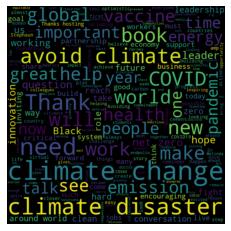

In [44]:
# world cloud plotting
allword = ' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=1000,height=1000,random_state=21,max_font_size=160).generate(allword)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
#create a  function to compute the negative neutral and positive analysis.
def getana(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getana)
df    

,Tweets,Subjectivity,Polarity,Analysis
0,The persistence of countless Rotarians gives m...,0.500000,0.000000,Neutral
1,I'm almost always interested in books about Am...,0.670000,0.490000,Positive
2,"This book gave me a deeper, more nuanced appre...",0.250000,0.250000,Positive
3,If you’re looking for a good book to read this...,0.600000,0.700000,Positive
4,The ’s commitment to share 870M COVID-19 vacci...,0.450000,0.400000,Positive
...,...,...,...,...
95,"After being sworn in this morning, I'm honor...",0.000000,0.000000,Neutral
96,"When it comes to preventing pandemics, scienti...",0.321970,0.096591,Positive
97,"COVID-19 has cost lives, sickened millions, an...",0.500000,-0.500000,Negative
98,This has been a year unlike any other in our l...,0.340909,0.102273,Positive


In [50]:
#print all positive tweets

j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

1)I'm almost always interested in books about American presidents, and I especially loved A Promised Land. It’s a fascinating look at what it’s like to steer a country through challenging times. 

2)This book gave me a deeper, more nuanced appreciation for the system that is at the core of humanity’s fight against COVID-19 and everything our foundation’s Global Health program is trying to do. 

3)If you’re looking for a good book to read this summer, these are some of my favorites. 

4)The ’s commitment to share 870M COVID-19 vaccine doses over the next year is welcome news - but time is not on our side. Vaccines must be delivered now to help control the pandemic everywhere and not disrupt the progress we've made. 

5)  As a physician, I’ve seen too many colleagues make the ultimate sacrifice on the frontlines. Over 115,000 health and care w…

6)Polio tools and infrastructure are also critical to combatting other public health emergencies, like COVID-19. It is more important than ever 

In [51]:
#print negtive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Negative'):
    print(str(j) + ')' +sortedDF['Tweets'][i])
    print()
    j=j+1

1)Communities of color have been hit hard by COVID-19. One of the reasons why parts of the medical system often fail Black and brown people is because it’s not designed with them in mind. Dr. Stephaun Wallace wants to change that. 

2)Dr. Stephaun Wallace () has spent the last year helping make COVID-19 vaccines work for everybody. Stephaun and his colleagues at  are working to reach the people who are usually left behind. 

3)It’s deeply unfair that the people who contribute the least to climate change will suffer the worst from its effects   

4)  Over the past few weeks health workers in Ethiopia 🇪🇹, Nigeria 🇳🇬, Sudan 🇸🇩 and the Philippines 🇵🇭 were vaccinated against COVI…

5)For decades, Australian researcher Ruth Bishop led global efforts to identify and combat rotavirus. Her life is a reminder of the importance of scientific research to uncover unknown pathogens and the power of vaccines to prevent suffering and save lives. 

6)  Black folks have questions about the COVID-19 vacc

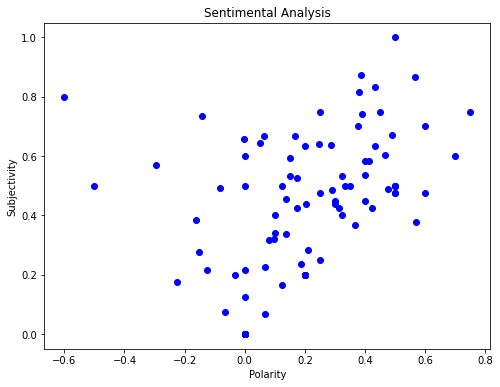

In [55]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [57]:
#get percentage of positve tweets.


ptweets = df[df.Analysis=='Positive']
ptweets = ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

67.0

In [58]:
#get the percentage of negative tweets
ntweets = df[df.Analysis=='Negative']
ntweets = ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)

12.0

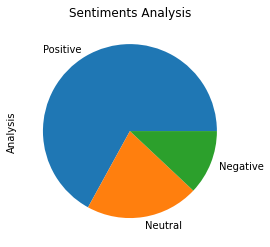

In [61]:
#show the value counts


df['Analysis'].value_counts()
plt.title('Sentiments Analysis')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()